In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Gradient Boosting feature selection

In [12]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

np.random.seed(1)
wine = datasets.load_wine()

# get the data
X = wine.data
y = wine.target

In [13]:
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

In [14]:
from sklearn.metrics import accuracy_score
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
# fit model no training data
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.61%


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [15]:
y_pred

array([2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0,
       0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2])

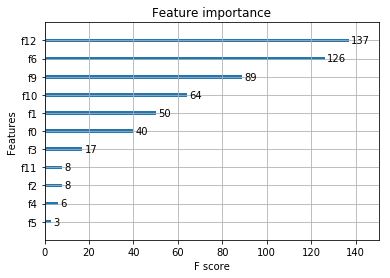

In [21]:
from xgboost import plot_importance
plot_importance(booster=model, max_num_features=15, importance_type='weight')#, ylabel=wine.feature_names )
plt.show()

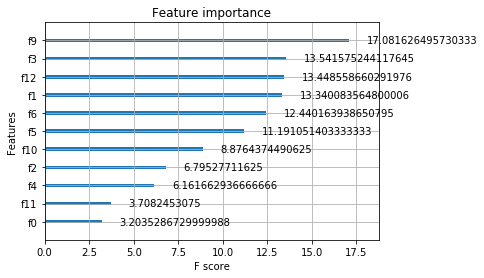

In [22]:
from xgboost import plot_importance
plot_importance(booster=model, importance_type='cover')#, ylabel=wine.feature_names)
plt.show()

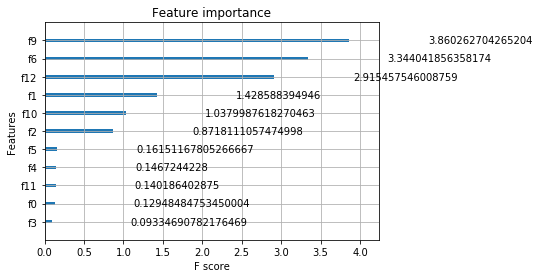

In [25]:
from xgboost import plot_importance
plot_importance(booster=model, importance_type='gain')#, ylabel=wine.feature_names)
plt.show()

In [26]:
model.feature_importances_

array([0.0729927 , 0.09124088, 0.01459854, 0.0310219 , 0.0109489 ,
       0.00547445, 0.229927  , 0.        , 0.        , 0.16240875,
       0.11678832, 0.01459854, 0.25      ], dtype=float32)

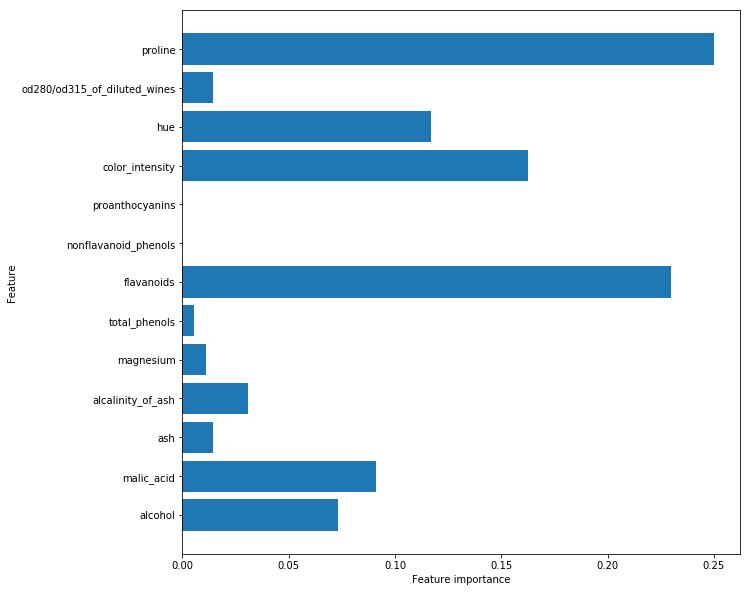

In [27]:
def plot_feature_importances(model, data):
    n_features = data.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plt.figure(figsize=(10, 10))
plot_feature_importances(model, wine)
plt.show()